#### To build this project, used TensorFlow and Keras. Also, used DenseNet architecture for classifying the chest X-ray.
The Dataset is collected from the following resources:<br>
[1] Covid Chest X-ray Dataset [here](https://github.com/ieee8023/covid-chestxray-dataset)<br>
[2] Chest X-ray Images [here](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia)<br>

## Import Libraries

In [1]:
import cv2                 
import numpy as np         
import os                  
from random import shuffle
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob as gb
from tensorflow.keras.utils import to_categorical

## Setting the dataset path


In [2]:
#read DataSet
TrainImage="./Dataset/train/"
TestImage="./Dataset/test/"


print(TrainImage)
print(TestImage)

./Dataset/train/
./Dataset/test/


In [4]:
#to get all image names in train file
Pneumonaimages = os.listdir(TrainImage + "/PNEUMONIA")
Normalimages = os.listdir(TrainImage + "/NORMAL")
COVID19images = os.listdir(TrainImage + "/COVID19")



## Explore the Data

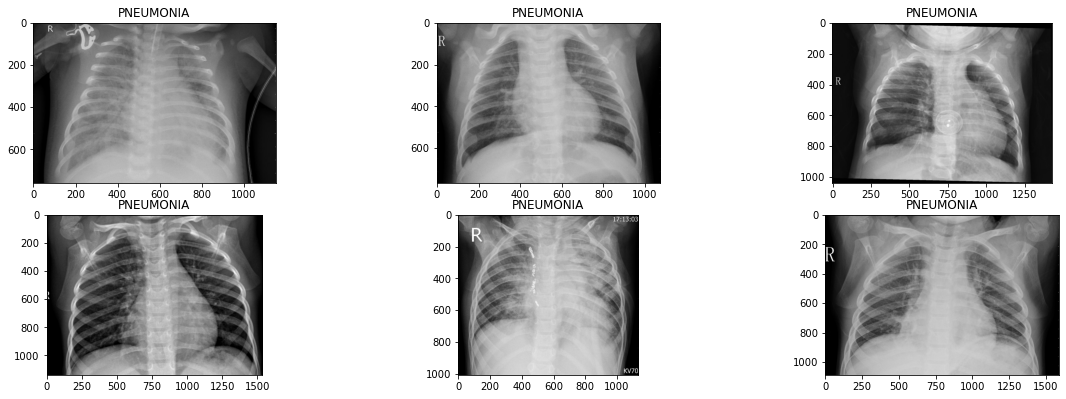

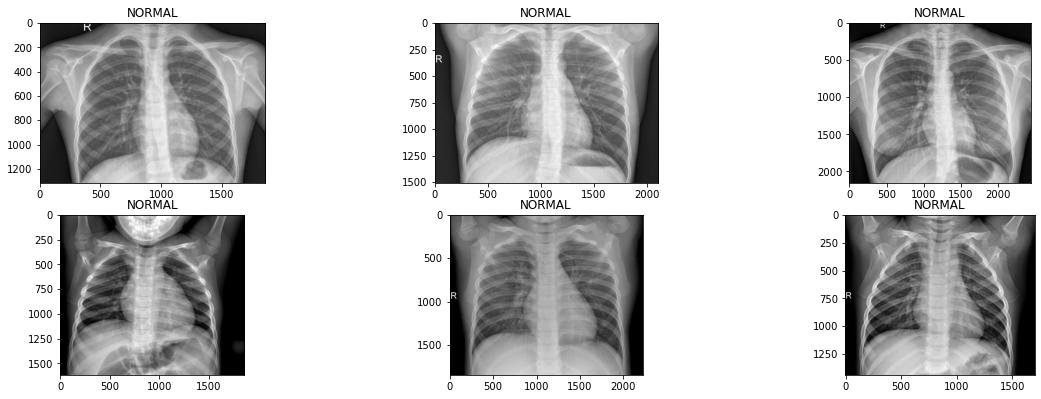

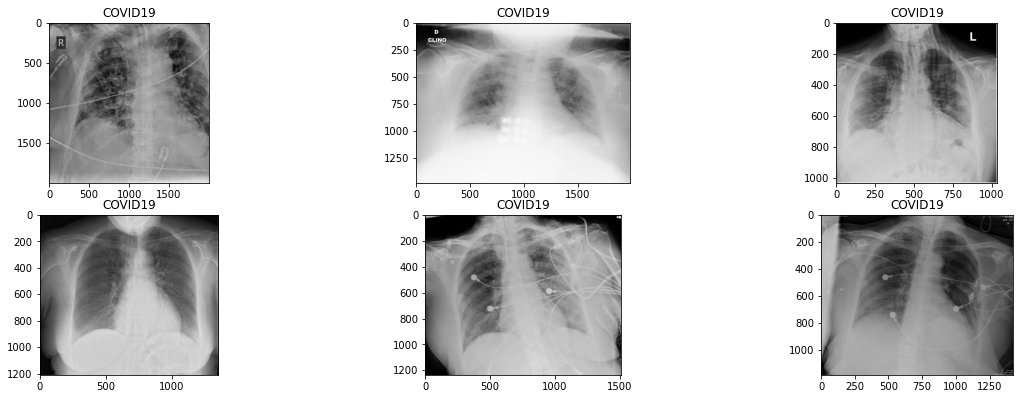

In [5]:
#plot to show the size of some image
#plot PNEUMONIA
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/PNEUMONIA",Pneumonaimages[i])),cmap='gray')
    plt.title("PNEUMONIA")
    
plt.show()
#plot NORMAL
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/NORMAL",Normalimages[i])),cmap='gray')
    plt.title("NORMAL")

plt.show()
#plot 
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(plt.imread(os.path.join(TrainImage + "/COVID19",COVID19images[i])),cmap='gray')
    plt.title("COVID19")

## ImageDataGenerator (DataAugmentation )

We also use the generator to transform the values in each batch so that their mean is $0$ and their standard deviation is 1.
This will facilitate model training by standardizing the input distribution

The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels.
We will want this because the pre-trained model that we'll use requires three-channel inputs.

In [6]:
train_datagen = ImageDataGenerator(
      samplewise_center=True,
      samplewise_std_normalization= True,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest'
                                  )

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator =train_datagen.flow_from_directory(
     TrainImage,
     batch_size= 256,
     shuffle=shuffle,
     target_size=(300, 300)

)

test_generator =train_datagen.flow_from_directory(
     TestImage,
     batch_size= 50,
     shuffle=shuffle,
     target_size=(300, 300)

)


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [7]:
trainShape=train_generator.__getitem__(0)[0].shape
testShape=test_generator.__getitem__(0)[0].shape

In [8]:
print(trainShape)

(256, 300, 300, 3)


In [9]:
print(testShape)

(50, 300, 300, 3)


In [10]:
#show labels
test_generator.__getitem__(0)[1]

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0

In [11]:
#Shape of Data
print("Train Shape \n",trainShape)
print("Test Shape \n",testShape)

Train Shape 
 (256, 300, 300, 3)
Test Shape 
 (50, 300, 300, 3)


In [12]:


Labels={'COVID19':0,'NORMAL':1 ,'PNEUMONIA':2 }

# convert label to code
def getCode(label):
    return Labels[label]


# convert code to label 
def getLabel(n):
    for x,c in Labels.items():
        if n==c:
            return x
        
        
        
#Test        
print(getCode('COVID19'))
print(getLabel(1))

0
NORMAL


## Explore Data After DataAugmentation and standardizing 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


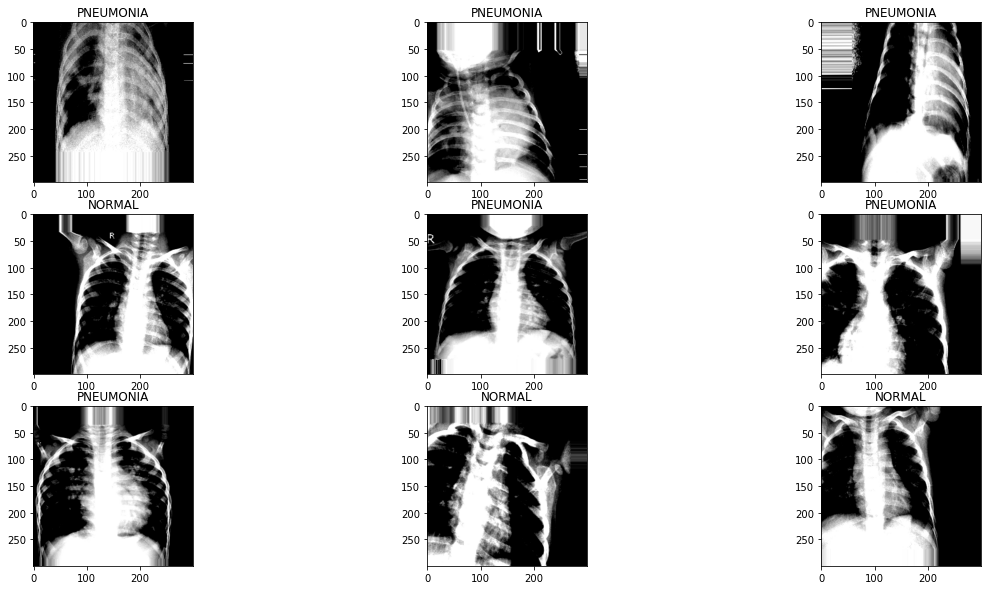

In [13]:
plt.figure(figsize=(20,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_generator.__getitem__(0)[0][i])
    plt.title(getLabel(np.argmax(train_generator.__getitem__(0)[1][i])))

## Load Data

In [14]:
#Reading image data
import glob as gb
import cv2  
sizeImage=300 # to resize the all image as same size

#to read all images from directory
def getData(Dir,sizeImage):
    X=[]
    y=[]
    for folder in  os.listdir(Dir) : #to get the file name 
        files = gb.glob(pathname= str( Dir  +"/" +folder+ '//*.jpg' )) # to get the images
        for file in files:
                picture=cv2.imread(file) #  or plt.imread(file)
                imageArray=cv2.resize(picture,(sizeImage,sizeImage))
                X.append(list(imageArray))
                y.append(getCode(folder))
    X=np.array(X)
    y=np.array(y)
    return X,y




In [16]:
#get train data
X_train, y_train = getData(TrainImage,sizeImage)
# get test data
X_test , y_test = getData(TestImage,sizeImage)



In [18]:
print("X_train Shape        ",X_train.shape)
print("X_test Shape         ",X_test.shape)


X_train Shape         (5144, 300, 300, 3)
X_test Shape          (1288, 300, 300, 3)


In [19]:
# #Convert y_train to categorical
y_train=to_categorical(y_train,3)
print("y_train ",y_train.shape)



#Convert y_train to categorical
y_test=to_categorical(y_test,3)
print("y_test ",y_test.shape)


y_train  (5144, 3, 3)
y_test  (1288, 3, 3)


## Build Model

In [20]:
#load weight
Network_Weight="./DenseNet-BC-169-32-no-top.h5"
print(Network_Weight)

./DenseNet-BC-169-32-no-top.h5


In [22]:
 
from tensorflow.keras.applications.densenet import DenseNet169
pre_trained_model = DenseNet169(input_shape = (sizeImage, sizeImage, 3), 
                                include_top = False, 
                                weights = None)
pre_trained_model.load_weights(Network_Weight)
for layer in pre_trained_model.layers:
    layer.trainable = False  #to make the layers to Freeze Weights
pre_trained_model.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 306, 306, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

conv5_block11_1_bn (BatchNormal (None, 9, 9, 128)    512         conv5_block11_1_conv[0][0]       
__________________________________________________________________________________________________
conv5_block11_1_relu (Activatio (None, 9, 9, 128)    0           conv5_block11_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block11_2_conv (Conv2D)   (None, 9, 9, 32)     36864       conv5_block11_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block11_concat (Concatena (None, 9, 9, 992)    0           conv5_block10_concat[0][0]       
                                                                 conv5_block11_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block12_0_bn (BatchNormal (None, 9, 9, 992)    3968        conv5_block11_concat[0][0]       
__________

In [23]:
from tensorflow.keras import Model


x = tf.keras.layers.Flatten()(pre_trained_model.output)

#Full Connected Layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)


x=tf.keras.layers.Dense(3 , activation='sigmoid')(x)
       

model = Model( pre_trained_model.input, x) 

print(model.summary())
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 306, 306, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 150, 150, 64) 9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 150, 150, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

conv5_block12_1_relu (Activatio (None, 9, 9, 128)    0           conv5_block12_1_bn[0][0]         
__________________________________________________________________________________________________
conv5_block12_2_conv (Conv2D)   (None, 9, 9, 32)     36864       conv5_block12_1_relu[0][0]       
__________________________________________________________________________________________________
conv5_block12_concat (Concatena (None, 9, 9, 1024)   0           conv5_block11_concat[0][0]       
                                                                 conv5_block12_2_conv[0][0]       
__________________________________________________________________________________________________
conv5_block13_0_bn (BatchNormal (None, 9, 9, 1024)   4096        conv5_block12_concat[0][0]       
__________________________________________________________________________________________________
conv5_block13_0_relu (Activatio (None, 9, 9, 1024)   0           conv5_block13_0_bn[0][0]         
__________

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [25]:
epochs = 50
history = model.fit_generator(train_generator,steps_per_epoch=20,callbacks=[lr_reduce,checkpoint] ,
         epochs=epochs)


C:\Users\supriti.ghosh\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
20/20 [==============================] - 533s 26s/step - loss: 3.5653 - accuracy: 0.5765
Epoch 2/50
20/20 [==============================] - 531s 26s/step - loss: 0.4161 - accuracy: 0.8551
Epoch 3/50
20/20 [==============================] - 510s 25s/step - loss: 0.2222 - accuracy: 0.9023
Epoch 4/50
20/20 [==============================] - 484s 24s/step - loss: 0.1714 - accuracy: 0.9242
Epoch 5/50
20/20 [==============================] - 484s 24s/step - loss: 0.1264 - accuracy: 0.9401
Epoch 6/50
20/20 [==============================] - 505s 25s/step - loss: 0.1156 - accuracy: 0.9457
Epoch 7/50
20/20 [==============================] - 504s 25s/step - loss: 0.1063 - accuracy: 0.9509
Epoch 8/50
20/20 [==============================] - 509s 25s/step - loss: 0.1006 - accuracy: 0.9494
Epoch 9/50
20/20 [==============================] - 505s 25s/step - loss: 0.1035 - accuracy: 0.9482
Epoch 10/50
20/20 [==============================] - 488s 24s/step - loss: 0.1097 - accuracy: 0.9458

Epoch 27/50
20/20 [==============================] - 512s 25s/step - loss: 0.0586 - accuracy: 0.9660
Epoch 28/50
20/20 [==============================] - 490s 24s/step - loss: 0.0784 - accuracy: 0.9573
Epoch 29/50
20/20 [==============================] - 489s 24s/step - loss: 0.0709 - accuracy: 0.9613
Epoch 30/50
20/20 [==============================] - 487s 25s/step - loss: 0.1187 - accuracy: 0.9269
Epoch 31/50
20/20 [==============================] - 526s 26s/step - loss: 0.0793 - accuracy: 0.9591
Epoch 32/50
20/20 [==============================] - 503s 25s/step - loss: 0.0638 - accuracy: 0.9667
Epoch 33/50
20/20 [==============================] - 504s 25s/step - loss: 0.0744 - accuracy: 0.9637
Epoch 34/50
20/20 [==============================] - 494s 24s/step - loss: 0.0784 - accuracy: 0.9587
Epoch 35/50
20/20 [==============================] - 504s 25s/step - loss: 0.0666 - accuracy: 0.9606
Epoch 36/50
20/20 [==============================] - 503s 25s/step - loss: 0.0627 - accurac

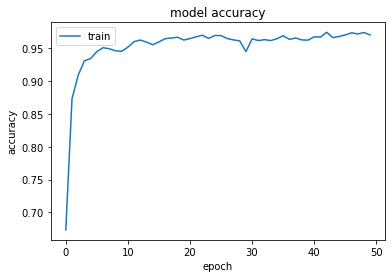

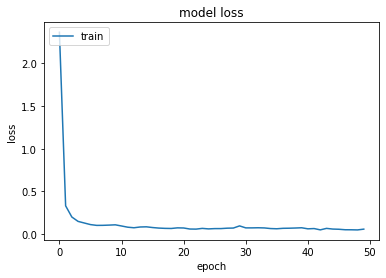

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [27]:
#Evaluate Model
model.evaluate(test_generator)

26/26 [==============================] - 137s 5s/step - loss: 0.0729 - accuracy: 0.9589


[0.07294473052024841, 0.9588509202003479]

In [28]:
model.save('modelCovid19___4.h5')

In [29]:
#prediction
pred=model.predict(test_generator)

In [30]:
print(len(pred))

1288


In [31]:
y_test=[]
for i in range(26):
    y_test.extend(test_generator.__getitem__(i)[1])

In [32]:
print(len(y_test))
y_test=np.array(y_test)

1288


In [33]:
y_test=np.argmax(y_test,axis=1)
pred= np.argmax(pred,axis=1)

In [34]:
print("pred \n",len(pred))
print("y_test \n",len(y_test))

pred 
 1288
y_test 
 1288


In [35]:
print("y_test \n",y_test)
print("pred \n",pred)

y_test 
 [1 1 2 ... 2 2 0]
pred 
 [0 2 2 ... 1 2 2]


In [36]:
#confusion_matrix to check in accuracy 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(pred,y_test)
print(cm)

[[ 12  28  74]
 [ 27  89 222]
 [ 77 200 559]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


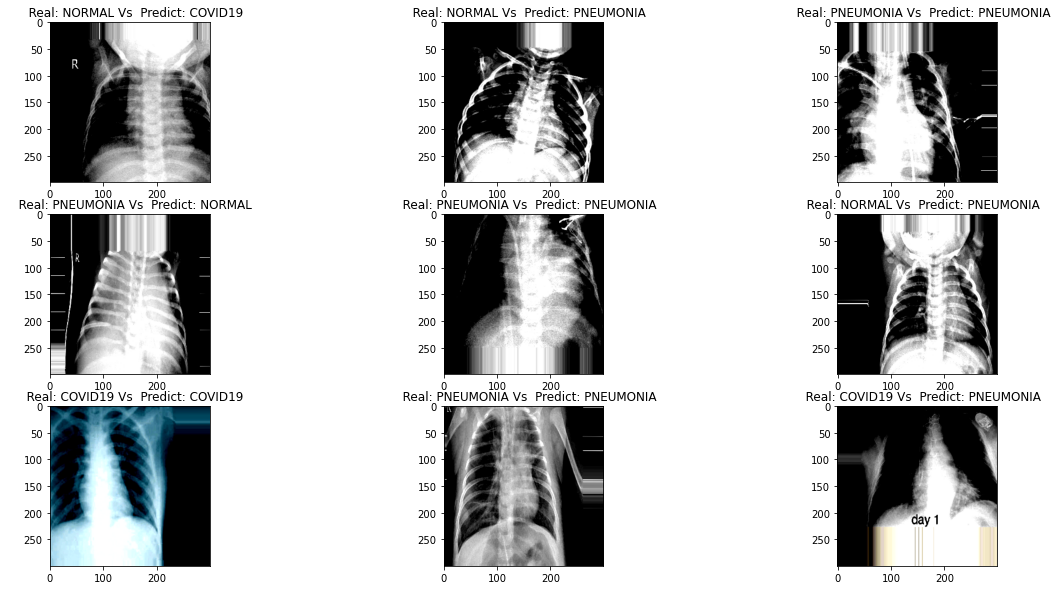

In [37]:
plt.figure(figsize=(20,10))
for i in range(0,9):
    
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(test_generator.__getitem__(0)[0][i],cmap='gray')
    plt.title(f"   Real: {getLabel(y_test[i])   } Vs  Predict: {getLabel(pred[i])}")

In [38]:
#lto load model
from keras.models import load_model
loadedModel=load_model("modelCovid19___4.h5")

In [39]:
loadedModel.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])
loadedModel.evaluate(test_generator)

26/26 [==============================] - 128s 5s/step - loss: 0.0630 - accuracy: 0.9564


[0.06975056231021881, 0.9526397585868835]